In [141]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import joblib
import seaborn as sns 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris


In [142]:
data = load_iris()

In [143]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [144]:
df = pd.DataFrame(data.data, columns=data.feature_names)

In [145]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [146]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [147]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [148]:
df['target'] = data.target

In [149]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [150]:
scaler = StandardScaler()


In [151]:
x = df.drop(columns = 'target')

In [152]:
y = df['target']

In [153]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [154]:
scaler = StandardScaler()

In [155]:
x_scaled = scaler.fit_transform(x)

In [156]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [157]:
x_train


array([[-1.50652052e+00,  1.24920112e+00, -1.56757623e+00,
        -1.31544430e+00],
       [-1.73673948e-01,  3.09077525e+00, -1.28338910e+00,
        -1.05217993e+00],
       [ 1.03800476e+00,  9.82172869e-02,  3.64896281e-01,
         2.64141916e-01],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
        -1.31544430e+00],
       [-1.74885626e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [ 5.53333275e-01, -1.28296331e+00,  7.05920842e-01,
         9.22302838e-01],
       [ 6.74501145e-01,  3.28414053e-01,  4.21733708e-01,
         3.95774101e-01],
       [-7.79513300e-01,  1.01900435e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-7.79513300e-01,  2.40018495e+00, -1.28338910e+00,
        -1.44707648e+00],
       [-5.25060772e-02, -8.22569778e-01,  7.62758269e-01,
         9.22302838e-01],
       [ 1.89829664e-01,  7.88807586e-01,  4.21733708e-01,
      

In [158]:
x_test


array([[ 3.10997534e-01, -5.92373012e-01,  5.35408562e-01,
         8.77547895e-04],
       [-1.73673948e-01,  1.70959465e+00, -1.16971425e+00,
        -1.18381211e+00],
       [ 2.24968346e+00, -1.05276654e+00,  1.78583195e+00,
         1.44883158e+00],
       [ 1.89829664e-01, -3.62176246e-01,  4.21733708e-01,
         3.95774101e-01],
       [ 1.15917263e+00, -5.92373012e-01,  5.92245988e-01,
         2.64141916e-01],
       [-5.37177559e-01,  7.88807586e-01, -1.28338910e+00,
        -1.05217993e+00],
       [-2.94841818e-01, -3.62176246e-01, -8.98031345e-02,
         1.32509732e-01],
       [ 1.28034050e+00,  9.82172869e-02,  7.62758269e-01,
         1.44883158e+00],
       [ 4.32165405e-01, -1.97355361e+00,  4.21733708e-01,
         3.95774101e-01],
       [-5.25060772e-02, -8.22569778e-01,  8.07091462e-02,
         8.77547895e-04],
       [ 7.95669016e-01,  3.28414053e-01,  7.62758269e-01,
         1.05393502e+00],
       [-1.26418478e+00, -1.31979479e-01, -1.34022653e+00,
      

In [159]:
y_train

22     0
15     0
65     1
11     0
42     0
      ..
71     1
106    2
14     0
92     1
102    2
Name: target, Length: 120, dtype: int64

In [160]:
y_test

73     1
18     0
118    2
78     1
76     1
31     0
64     1
141    2
68     1
82     1
110    2
12     0
36     0
9      0
19     0
56     1
104    2
69     1
55     1
132    2
29     0
127    2
26     0
128    2
131    2
145    2
108    2
143    2
45     0
30     0
Name: target, dtype: int64

In [161]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [162]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [163]:
prediciton = knn_model.predict(x_test)

In [164]:
prediciton

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [165]:
print("Accuracy of the model is: ", accuracy_score(y_test,prediciton))

Accuracy of the model is:  1.0


In [166]:
print("Classification Report of the KNN Model: \n", classification_report(y_test, prediciton))

Classification Report of the KNN Model: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [167]:
print("Confusion Matrix of KNN Model: \n" ,confusion_matrix(y_test,prediciton))

Confusion Matrix of KNN Model: 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [179]:
# A. Actual Labels
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
draw_class_circles(axes[0], X_pca, y)
axes[0].set_title('Actual Iris Classes')
axes[0].set_xlabel('PCA 1')
axes[0].set_ylabel('PCA 2')

Text(4.444444444444452, 0.5, 'PCA 2')

In [173]:
# 4. Create meshgrid for decision boundary
h = 0.02  # step size
x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Pad the grid with zeros for the other two features
grid_points = np.c_[xx.ravel(), yy.ravel(), np.zeros((xx.size, 2))]
Z = knn_model.predict(grid_points)
Z = Z.reshape(xx.shape)

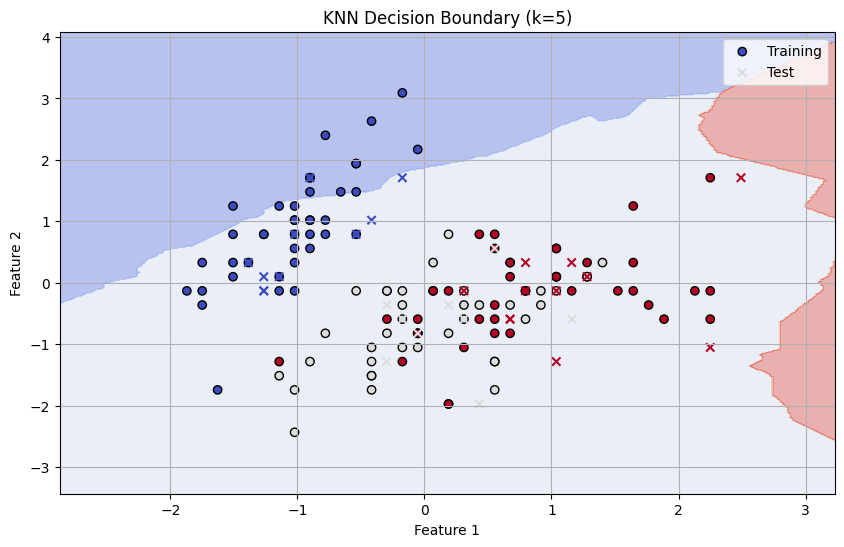

In [175]:
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.coolwarm, label="Training")
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, edgecolors='k', marker='x', cmap=plt.cm.coolwarm, label="Test")
plt.title("KNN Decision Boundary (k=5)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

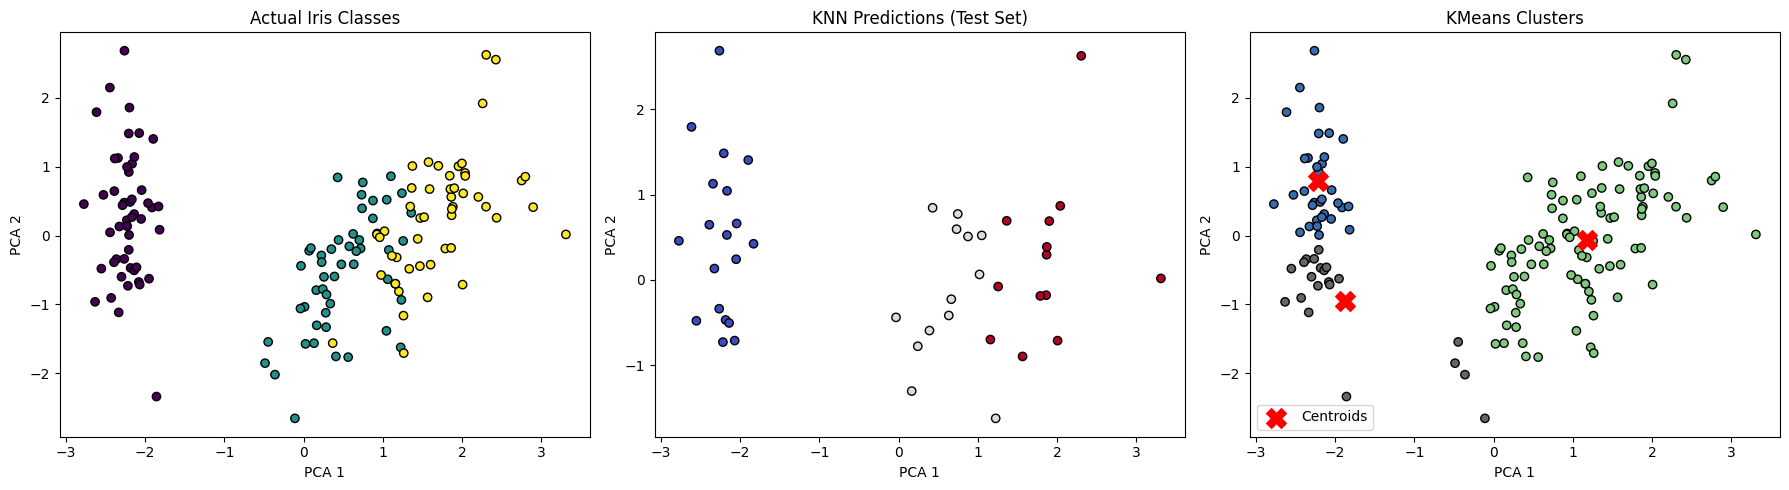

In [176]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

# 1. Load Iris dataset
data = load_iris()
X = data.data
y = data.target
target_names = data.target_names

# 2. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. PCA to reduce to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# 5. Train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# 6. KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

# 7. Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Actual Labels
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
axes[0].set_title('Actual Iris Classes')
axes[0].set_xlabel('PCA 1')
axes[0].set_ylabel('PCA 2')

# KNN Predictions
axes[1].scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', edgecolor='k')
axes[1].set_title('KNN Predictions (Test Set)')
axes[1].set_xlabel('PCA 1')
axes[1].set_ylabel('PCA 2')

# KMeans Clustering
axes[2].scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='Accent', edgecolor='k')
axes[2].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                s=200, c='red', marker='X', label='Centroids')
axes[2].set_title('KMeans Clusters')
axes[2].set_xlabel('PCA 1')
axes[2].set_ylabel('PCA 2')
axes[2].legend()

plt.tight_layout()
plt.show()


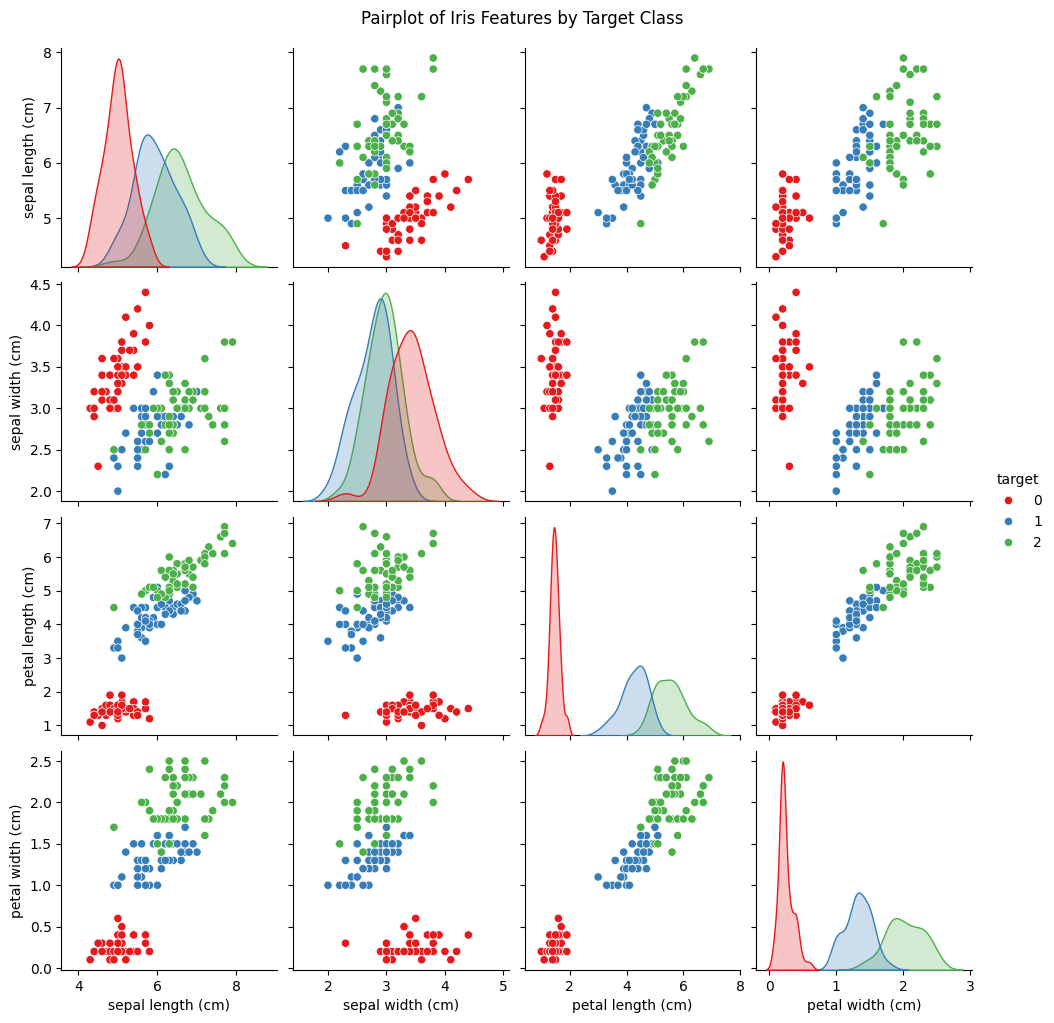

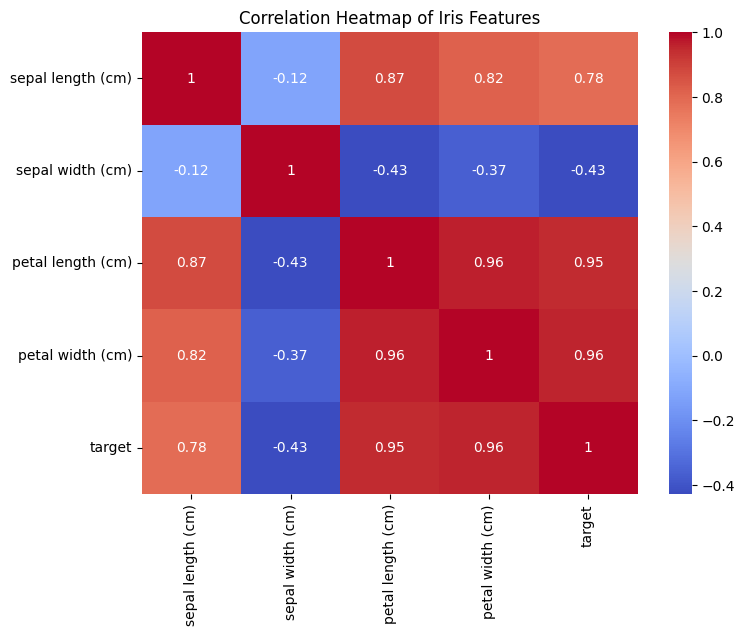

In [ ]:
# Pairplot to visualize feature relationships and class separation
sns.pairplot(df, hue='target', palette='Set1', diag_kind='kde')
plt.suptitle("Pairplot of Iris Features by Target Class", y=1.02)
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Iris Features")
plt.show()

In [ ]:
joblib.dump(knn_model, "KNN_MODEL.pkl")

['KNN_MODEL.pkl']

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

param = {"n_neighbors": np.arange(1, 100)}
grid_knn = GridSearchCV(KNeighborsClassifier(), param, cv=5, scoring="accuracy", n_jobs=1, verbose=0)
grid_knn.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=1,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             scoring='accuracy')

In [ ]:
grid_knn.best_params_

{'n_neighbors': np.int64(3)}

In [ ]:
knn_8 = KNeighborsClassifier(n_neighbors=8)
knn_8.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [ ]:
prediciton1 = knn_8.predict(x_test)

In [ ]:
prediciton1

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [ ]:
print("Accuracy of the model after grid-search cv : ", accuracy_score(y_test, prediciton1))

Accuracy of the model after grid-search cv :  1.0


In [ ]:
print("Classification report of KNN after grid-search cv :\n", classification_report(y_test, prediciton1))

Classification report of KNN after grid-search cv :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
print("Confusion Matrix of KNN after grid search : \n" ,confusion_matrix(y_test, prediciton1))

Confusion Matrix of KNN after grid search : 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [ ]:
joblib.dump(knn_8, "KNN_GRID.pkl")

['KNN_GRID.pkl']